**Name:** Weida Xu (wx2198)

# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

## Part (a)
a) Load in hw2data.csv from ../data into a pandas dataframe.

In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
data = pd.read_csv('data/hw2data.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,y
0,0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768,-1.179158,1.301428,...,0.178793,-0.799422,0.240788,0.289121,0.412871,-0.198399,0.094192,-1.147611,-0.358114,-2.663126
1,0.555963,0.892474,-0.422315,0.104714,0.228053,0.201480,0.540774,-1.818078,-0.049324,0.239034,...,-0.740137,-0.565498,0.476031,-2.158069,1.318551,-0.239297,-0.246794,-1.079343,-0.114226,10.399650
2,0.013240,-0.121945,0.339059,-0.589632,-0.895816,0.548328,0.098667,0.197181,1.059027,-1.022564,...,-0.739936,1.315138,-0.323457,0.197828,0.097751,1.401523,0.158434,-1.141901,-1.310970,-21.762801
3,-1.532921,-1.711970,0.046135,-0.958374,-0.080812,-0.703859,-0.770784,-0.480845,0.703586,0.929145,...,0.473488,1.855246,1.415656,-0.302746,0.989679,0.585851,1.136388,0.671617,-0.974167,2.139453
4,-1.619685,0.572627,1.902618,-0.775664,-0.188090,-1.035748,1.177830,-2.305167,-2.263660,0.375020,...,-1.303220,0.466751,0.161106,0.320032,2.079177,-0.907466,-0.192404,-1.212516,-0.080599,0.194017


## Part (b)
b) Set y to be the y variable in the dataframe from a and X to be the remaining features.

In [56]:
y = data.iloc[:,-1]
X = data.iloc[:,0:500]

## Part (c)
c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

In [57]:
X_train = X[0:int(len(data)*0.8)]
X_test = X[int(len(data)*0.8):]
y_train = y[0:int(len(data)*0.8)]
y_test = y[int(len(data)*0.8):]

In [122]:
alphas = np.logspace(-8,-3,1000)
from sklearn.linear_model import Lasso

scores = []
train_errors = []
test_errors = []

for alpha in alphas:
    regr = Lasso(alpha=alpha)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test,y_test))
    train_errors.append(regr.score(X_train, y_train))
    test_errors.append(regr.score(X_test,y_test))


C:\adiewux\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


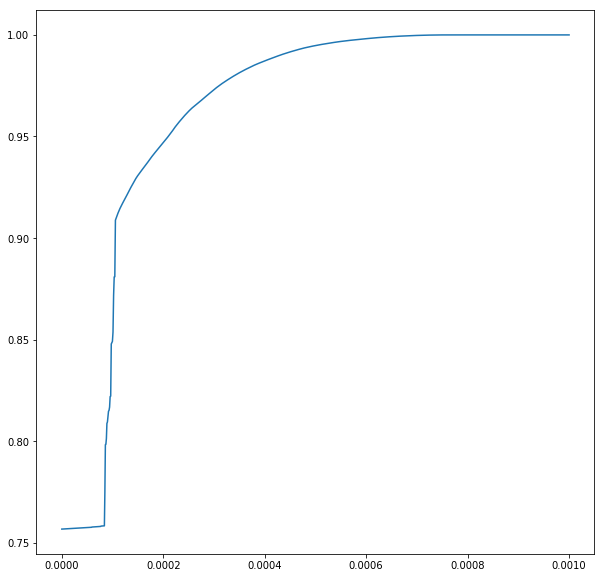

In [123]:
plt.plot(alphas,scores)

In [124]:
np.argmax(scores)

976

In [125]:
alpha_best = alphas[np.argmax(scores)]
print(alpha_best)

0.000767158117678


## Part (d)
d) Plot the training perforamnce versus the testing performance, and observe whree the test performance is
maximized. I've written an outline of the code you need.

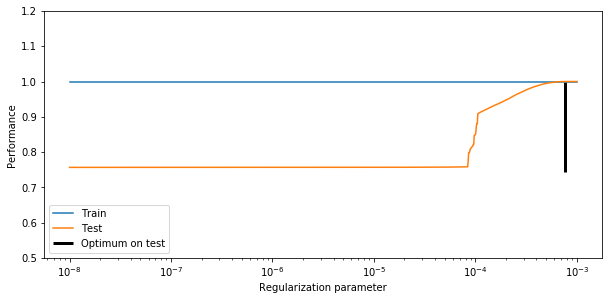

In [126]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize']=(10,10)
plt.subplot(2, 1, 1)

# Fill these in
alphas = alphas
train_errors=train_errors
test_errors=test_errors
alpha_optim=alpha_best



plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0.5, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')


plt.show()


- It can be seen that the optimal alpha is chosen where test data score is maximised.

## Part (e)
e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

In [127]:
optm = Lasso(alpha = alpha_best)
optm.fit(X_train, y_train)
coef_table = pd.DataFrame(optm.coef_)
top_index = abs(coef_table).sort_values(0, ascending=False).index[0:100]
top_plot = coef_table.loc[top_index,:]

<Container object of 3 artists>

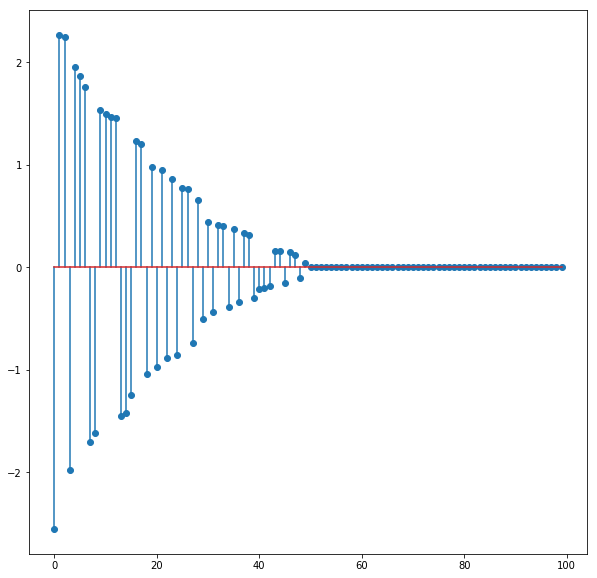

In [128]:
plt.stem(top_plot)

- Plotting the top 100 coefficients reveals that many of them are 0. This is consistent with Lasso regression, which has an L1 regularization term. L1 regularization is not uniformly convex, and results in many coefficient being set to 0. 

## Part (f)
f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

In [129]:
from sklearn.model_selection import cross_val_score

C:\adiewux\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\adiewux\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\adiewux\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


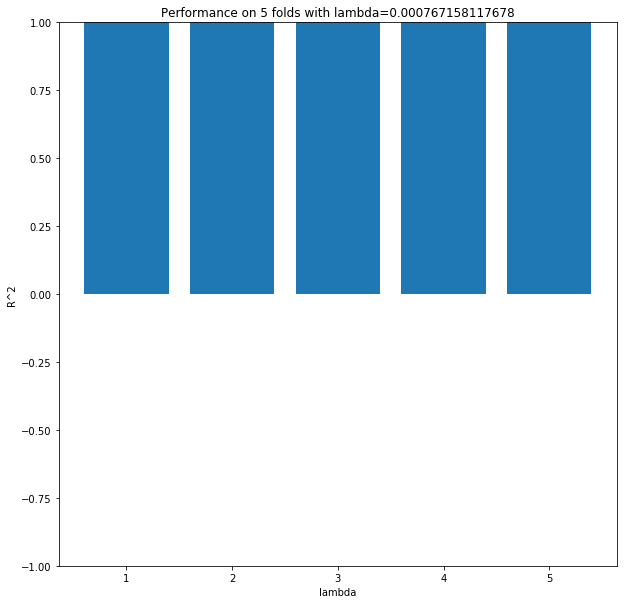

In [130]:
regr2 = Lasso(alpha=alpha_best, tol=1e-10)
scores = cross_val_score(regr2, X, y, cv=5 )
plt.ylim([-1,1])
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.title('Performance on 5 folds with lambda=' + str(alpha_best))
plt.bar(range(1,6),scores)
plt.show()

In [132]:
scores

array([ 0.99932035,  0.99997757,  0.99999901,  0.99999816,  0.99999546])

- The optimal alpha seems to work well on all the random subset of data, achieving a near perfect score or $R^2$ on the testing data for each subset. 

## Part (g)
g) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [96]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs


X = X
y = y
alpha_best = 0.00076715811767793022
scaler = preprocessing.StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)

coeffs=run_cv_coeffs(X_scaled,np.array(y),Lasso,alpha=alpha_best)

C:\adiewux\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [97]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

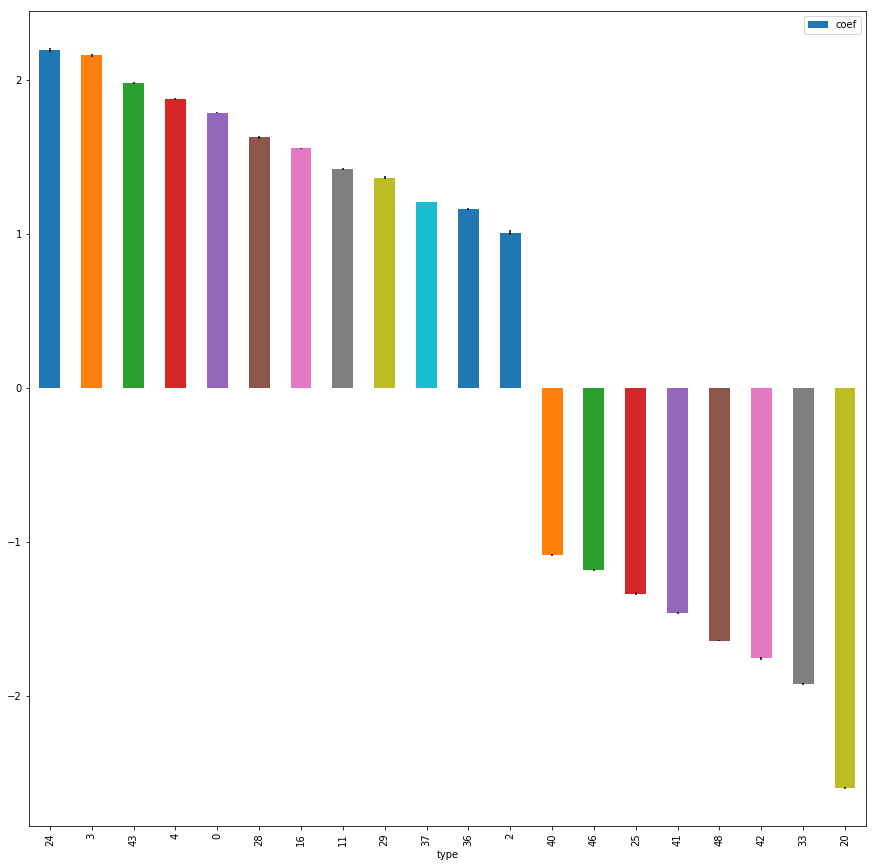

In [98]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort_values(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))